# Week 5

## Task - 1 Smooth LED Brightness Controller

**Potentiometer (pot)** = a 3-terminal variable resistor. Turning the knob moves a wiper along a resistive track, changing how much of the track is `before` vs. `after` the wiper.

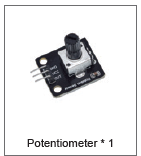

**PWM (Pulse-Width Modulation)** is a way to control power by turning a pin ON and OFF very fast. The thing you’re powering (like an LED or motor) “averages” this, so it looks like smooth brightness/speed.

- Frequency (Hz): how many ON/OFF cycles happen each second.
- Duty cycle (%): how much of each cycle is ON.
    - 0% = always OFF, 50% = half ON (medium), 100% = always ON.
 
**Why use a Potentiometer?**
- Dim LEDs,
- control motor speed,
- make tones on buzzers,
- drive servos (special timing).

**ADC (Analog-to-Digital Converter)** turns a voltage into a number your code can read.

- **Input**: a smooth analog voltage (e.g., 0–3.3 V on a Raspberry Pi Pico).

- **Output**: a digital value. On Pico, read_u16() gives 0…65535

#### Scenario
As a Junior Developer at TechVision Kids, you are part of an exciting initiative to help young students learn about electronics and coding. A local school has approached us to create a fun and educational activity that teaches students how Analog inputs and PWM (Pulse Width Modulation) work together. Your task is to prototype a simple MicroPython-based project that allows users to control the brightness of an LED using a potentiometer. This hands-on demo will help students see how user input can dynamically affect real-time electronic components.

#### Your Task:
Core Features (Must-Have):
1. Connect an LED to the appropriate GPIO on the Raspberry Pi Pico 
2. Connect a potentiometer to the appropriate GPIO(ADC).
3. Use ADC to read the Analog value from the potentiometer.
4. Use PWM to control the LED’s brightness based on the potentiometer input.
5. Add a short delay in the loop to smooth the brightness transition.
#### Hardware & tools

- Raspberry Pi Pico / Pico W
- 1 × LED (5 mm)
- 1 ×  potentiometer
- Breadboard
- Jumper wires

#### Example Code
```python
from machine import Pin, ADC, PWM
import time

# LED on GP16 
led_pin = Pin(16, Pin.OUT)
# Potentiometer on GP26 
pot_pin = ADC(26)

# PWM on the LED pin
led_pwm = PWM(led_pin)
led_pwm.freq(1000)  # 1 kHz PWM

while True:
    pot_value = pot_pin.read_u16()      # 0..65535
    led_pwm.duty_u16(pot_value)         # match ADC range directly
    time.sleep(0.1)                     # small delay


```





## Task -2 Alert Prototype

#### Scenario

Your facilities team wants a single-knob sounder for classroom alerts: twist to choose a tone (low = calm chime, high = urgent beep), twist fully down to mute. You’ll prototype this on a Raspberry Pi Pico using a passive buzzer and a potentiometer. The buzzer’s pitch changes with the knob; a small dead-zone near zero guarantees silence.


#### Hardware Requirements (and wiring)

- Raspberry Pi Pico / Pico W
- Passive buzzer 
- Potentiometer 
- Breadboard
- Jumper wires

#### Example Code
 ```python
from machine import Pin, ADC, PWM
import time

buz = PWM(Pin(16))
buz.duty_u16(0)                 # start muted
pot = ADC(26)

HI_DUTY   = int(0.50 * 65535)   # ~50% duty sounds strong on passive buzzer
MUTE_BAND = 1200                # small dead zone near 0 for guaranteed mute
F_MIN     = 100                 # Hz
F_MAX     = 5000                # Hz

while True:
    v = pot.read_u16()          # 0..65535

    if v <= MUTE_BAND:
        # Hard mute when knob is low
        buz.duty_u16(0)
    else:
        # Map remaining range to frequency, then set a strong duty
        f = F_MIN + (v - MUTE_BAND) * (F_MAX - F_MIN) // (65535 - MUTE_BAND)
        buz.freq(int(f))
        buz.duty_u16(HI_DUTY)

    time.sleep(0.01)            # smooth updates

```

## Task - 3 Automatic Street Lighting with an LDR (Smart City Prototype)
#### Photoresistor (LDR)
A photoresistor, also known as a Light Dependent Resistor (LDR), is a sensor that changes its resistance based on the amount of light falling on it. When light increases, its resistance decreases. When it’s dark, the resistance increases.

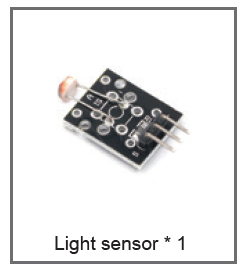


#### Scenario

Your council wants energy-efficient streetlights that switch ON at dusk and OFF at dawn. You’ll build a desk prototype with a Raspberry Pi Pico, a photoresistor (LDR) to sense ambient light, and an LED to represent a streetlight. The system should avoid flicker around twilight and optionally dim the light so it’s brighter at night and low in the evening.

#### Hardware Requirements

- Raspberry Pi Pico W
- LDR (photoresistor) 
- LED
- Breadboard
- Jumper wires


#### Example Code

```python
from machine import Pin,ADC
from time import sleep
     
ldr =ADC(Pin(27))
     
while True:
    print(f" LDR Value is : {ldr.read_u16()}")
    sleep(1)
```

**Resources:**
**Analog to Digital Conversion**

https://docs.micropython.org/en/latest/esp8266/tutorial/adc.html

**Python String Formatting**

https://www.w3schools.com/python/python_string_formatting.asp

## Task -4 RGB Status Lamp (Menu-Controlled)

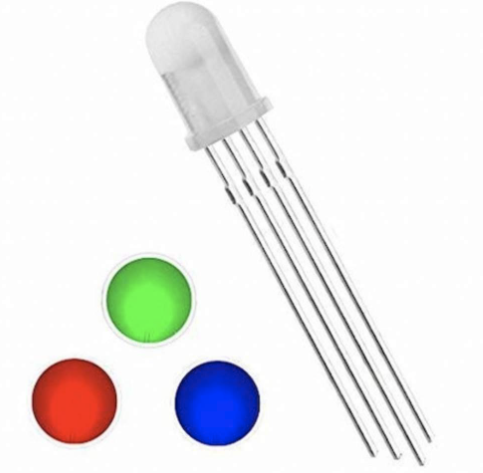

**RGB light** = light made by mixing the three additive primaries: Red, Green, and Blue.
By varying each colour’s brightness, you can create almost any colour (red+green=yellow, green+blue=cyan, red+blue=magenta, all three = white).

In the picture you shared, there is a 4-pin RGB LED:

- Inside are three tiny LEDs (R, G, B) in one package.
- One pin is common (either common-cathode to GND or common-anode to 3V3); the longest leg is usually the common.
- The frosted/diffused lens helps blend the colours so you see one uniform colour.

With a microcontroller, you control each channel’s brightness (often by PWM) to “mix” colours—e.g., set R/G/B to different duty cycles to get any hue and intensity. RGB light is used in indicators, displays, mood lighting, keyboards, LED strips, and IoT status lamps.

#### Scenario

Your classroom/lab needs a quiet, glanceable status light so students know when you’re available, busy, or on a call—without interrupting. You’ll build a menu-driven RGB status lamp on a Raspberry Pi Pico. Selecting a number in the terminal sets the lamp colour (and meaning) instantly:

- 🟥 Red = Do Not Disturb
- 🟩 Green = Ready / Available
- 🟦 Blue = Help Needed
- 🟨 Yellow = Busy
- 📞 Cyan = On a Call
- 📝 Magenta = Review Requested
- ⚪ White = Standby
- 🔕 OFF = Status Cleared

#### Hardware Requirements

- Raspberry Pi Pico / Pico W
- RGB LED (common cathode)
- Breadboard
- Jumper wires

#### Example Code

```python

from machine import Pin
from time import sleep

# GPIO assignments (change if your wiring differs)
red   = Pin(20, Pin.OUT)
green = Pin(19, Pin.OUT)
blue  = Pin(18, Pin.OUT)

# ---- Helpers to control the LED channels ----
def all_off():
    """Turn OFF all color channels."""
    red.off(); green.off(); blue.off()

def Red():
    """Solid RED (Do Not Disturb)."""
    all_off()
    red.on()

def Green():
    """Solid GREEN (Ready/Available)."""
    all_off()
    green.on()

def Blue():
    """Solid BLUE (Help Needed)."""
    all_off()
    blue.on()

def Yellow():
    """Solid YELLOW = Red + Green (Busy)."""
    all_off()
    red.on(); green.on()

def Cyan():
    """Solid CYAN = Green + Blue (On a Call)."""
    all_off()
    green.on(); blue.on()

def Magenta():
    """Solid MAGENTA = Red + Blue (Review Requested)."""
    all_off()
    red.on(); blue.on()

def White():
    """Solid WHITE = Red + Green + Blue (Standby)."""
    all_off()
    red.on(); green.on(); blue.on()

# ---- Main menu loop ----
while True:
    print("\n Available colors")
    print(" 1. Red ")
    print(" 2. Green ")
    print(" 3. Blue ")
    print(" 4. Yellow ")
    print(" 5. Cyan ")
    print(" 6. Magenta")
    print(" 7. White")
    print(" 8. OFF")
    print(" 9. Exit")

    # NOTE: prompt corrected to 1–9
    choice = input("\nEnter Status number (1-9): ").strip()

    if choice == "1":
        print("🟥 Do Not Disturb — focused work/exam in progress")
        Red()
    elif choice == "2":
        print("🟩 Ready — available for questions")
        Green()
    elif choice == "3":
        print("🟦 Help Needed — please assist")
        Blue()
    elif choice == "4":
        print("🟨 Busy — in a meeting / task in progress")
        Yellow()
    elif choice == "5":
        print("📞 On a Call — remote support active")
        Cyan()
    elif choice == "6":
        print("📝 Review Requested — supervisor/peer check")
        Magenta()
    elif choice == "7":
        print("⚪ Standby — system idle/ready")
        White()
    elif choice == "8":
        print("🔕 All lights off — status cleared")
        all_off()
    elif choice == "9":
        print("Exiting program.")
        break
    else:
        print(" ❗ Please enter a valid number 1–9")

    # Small delay to avoid spamming the console if keys repeat
    sleep(0.1)

```

## Task - 5 Interactive Music Box with RGB LED Effectse

#### Scenario

You are a developer working on an interactive music box project that combines sound and visual effects using an IoT-based microcontroller. Your objective is to develop a Python-based program for a Raspberry Pi Pico microcontroller that plays melodies while synchronising with an RGB LED. Users can select different melodies from a menu, and each note will be accompanied by a corresponding LED colour effect. The system should allow users to navigate through melodies and exit when needed.

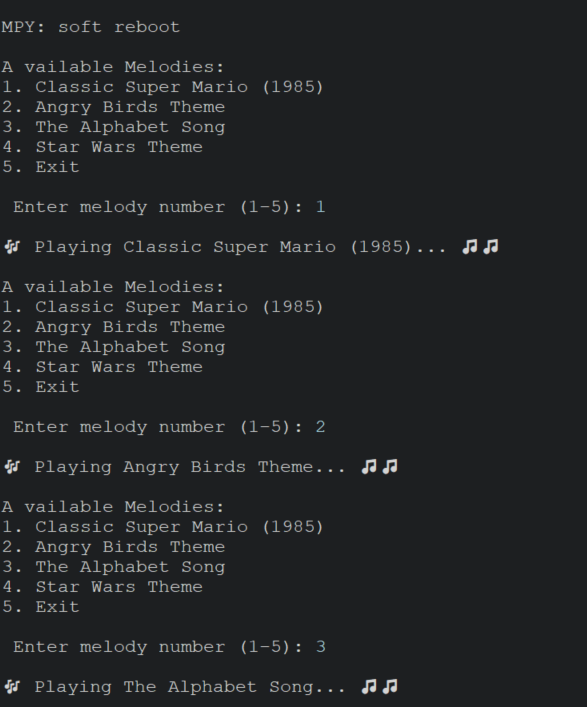

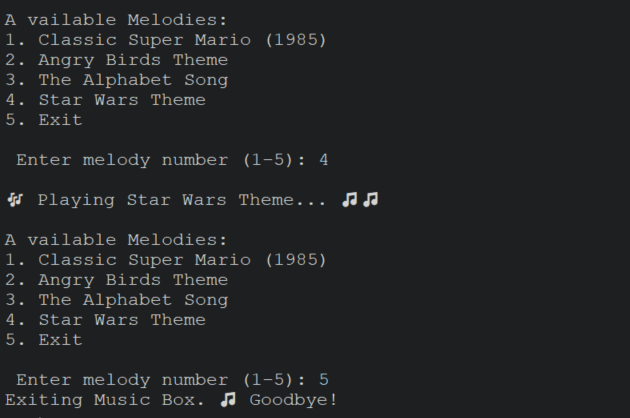

#### Hardware Requirements:
- Raspberry Pi Pico or ESP32
- Breadboard
- RGB light
- Passive Buzzer
- Jumper wires

#### Programming Requirements:
- Use MicroPython’s machine and time modules for hardware control
- Implement PWM-based sound generation using a passive buzzer
- Integrate RGB LED effects that correspond to musical notes
- Provide a user-friendly menu system for melody selection
- Include a variety of melodies (e.g., Super Mario, Angry Birds, Star Wars, Alphabet Song)
- Implement error handling for invalid user inputs
- Ensure smooth transitions between tones and LED colour changes


#### Melodies:
**Alphabet** = 

    play_tone(262, 0.4, (65535, 0, 0))
    play_tone(262, 0.4, (0, 65535, 0))
    play_tone(392, 0.4, (0, 0, 65535))
    play_tone(392, 0.4, (65535, 65535, 0))
    play_tone(440, 0.4, (0, 65535, 65535))
    play_tone(440, 0.4, (65535, 0, 65535))
    play_tone(392, 1.0, (65535, 65535, 65535))
    time.sleep(1)
    
**Mario_classic** =

    play_tone(660, 0.1, (65535, 0, 0))
    play_tone(660, 0.1, (0, 65535, 0))
    play_tone(660, 0.1, (0, 0, 65535))
    play_tone(510, 0.1, (65535, 65535, 0))
    play_tone(660, 0.1, (0, 65535, 65535))
    play_tone(770, 0.1, (65535, 0, 65535))
    play_tone(380, 0.1, (65535, 65535, 65535))
    play_tone(510, 0.1, (255, 128, 0))
    play_tone(380, 0.1, (65535, 0, 0))
    play_tone(320, 0.1, (0, 65535, 0))
    play_tone(440, 0.1, (0, 0, 65535))
    play_tone(480, 0.1, (65535, 65535, 0))
    time.sleep(1)

**Angry_birds** = 

    play_tone(440, 0.4, (65535, 0, 0))
    play_tone(494, 0.4, (0, 65535, 0))
    play_tone(523, 0.4, (0, 0, 65535))
    play_tone(587, 0.4, (65535, 65535, 0))
    play_tone(659, 0.4, (0, 65535, 65535))
    play_tone(698, 0.4, (65535, 0, 65535))
    play_tone(784, 0.6, (65535, 65535, 65535))
    time.sleep(1)

**Star_wars** = 

    play_tone(880, 0.4, (65535, 0, 0))
    play_tone(880, 0.4, (65535, 65535, 0))
    play_tone(880, 0.4, (0, 65535, 0))
    play_tone(698, 0.35, (0, 0, 65535))
    play_tone(523, 0.15, (65535, 65535, 65535))
    play_tone(880, 0.4, (65535, 0, 65535))
    play_tone(698, 0.35, (0, 65535, 65535))
    play_tone(523, 0.15, (65535, 128, 0))
    play_tone(440, 0.7, (65535, 65535, 65535))

    play_tone(880, 0.4, (65535, 0, 0))
    play_tone(880, 0.4, (0, 65535, 0))
    play_tone(880, 0.4, (0, 0, 65535))
    play_tone(698, 0.4, (65535, 65535, 0))
    play_tone(523, 0.4, (0, 65535, 65535))
    play_tone(698, 0.4, (65535, 0, 65535))
    play_tone(880, 0.6, (65535, 65535, 65535))
    play_tone(784, 0.6, (255, 128, 0))
    play_tone(698, 0.6, (65535, 0, 0))
    play_tone(659, 0.7, (0, 65535, 0))
    time.sleep(1)

